## Importing necessary packages

In [1]:
using DataFrames, GLM,XLSX, CSV, FileIO,ExcelFiles,TableView
using StatsBase, CategoricalArrays, Statistics
using Lathe.preprocess: TrainTestSplit
# using  StatsPlots, Plotly

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17702478248069273325\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14877006070807808291\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17702478248069273325\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
ENV["COLUMNS"] = 1000 ## to display more columns while showing a df

1000

## Load Data

In [3]:
train = DataFrame(load("Data_Train.xlsx", "Sheet1"))
println(size(train))

(5525, 14)


In [4]:
test = DataFrame(load("Data_Test.xlsx","Sheet1"))
println(size(test))

(494, 13)


## Descriptive Stats

In [5]:
names(train)

14-element Array{Symbol,1}:
 :Id               
 :Name             
 :Location         
 :Year             
 :Kilometers_Driven
 :Fuel_Type        
 :Transmission     
 :Owner_Type       
 :Mileage          
 :Engine           
 :Power            
 :Seats            
 :New_Price        
 :Price            

In [6]:
describe(train)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Id,2763.0,1.0,2763.0,5525.0,,,Float64
2,Name,,Ambassador Classic Nova Diesel,,Volvo XC90 2007-2015 D5 AWD,1815,,String
3,Location,,Ahmedabad,,Pune,11,,String
4,Year,2013.38,1998.0,2014.0,2019.0,,,Float64
5,Kilometers_Driven,58860.6,171.0,53000.0,6.5e6,,,Float64
6,Fuel_Type,,CNG,,Petrol,5,,String
7,Transmission,,Automatic,,Manual,2,,String
8,Owner_Type,,First,,Third,4,,String
9,Mileage,,0.0 kmpl,,9.9 kmpl,435,2,"Union{Missing, String}"


In [7]:
describe(test)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Id,7247.5,7001.0,7247.5,7494.0,,,Float64
2,Name,,Audi A4 2.0 TDI,,Volvo XC60 D5,367,,String
3,Location,,Ahmedabad,,Pune,11,,String
4,Year,2013.15,2001.0,2013.0,2019.0,,,Float64
5,Kilometers_Driven,57371.2,4000.0,54750.0,180000.0,,,Float64
6,Fuel_Type,,CNG,,Petrol,4,,String
7,Transmission,,Automatic,,Manual,2,,String
8,Owner_Type,,First,,Third,4,,String
9,Mileage,,0.0 kmpl,,9.0 kmpl,193,,String


In [8]:
DataFrame(columns = names(train),missing_values_percent = colwise(x -> (sum(ismissing.(x))/size(train)[1])*100, train))


┌ Warning: `colwise(f, d::AbstractDataFrame)` is deprecated, use `[f(col) for col = eachcol(d)]` instead.
│   caller = top-level scope at In[8]:1
└ @ Core In[8]:1


,columns,missing_values_percent
,Symbol,Float64
1,Id,0.0
2,Name,0.0
3,Location,0.0
4,Year,0.0
5,Kilometers_Driven,0.0
6,Fuel_Type,0.0
7,Transmission,0.0
8,Owner_Type,0.0
9,Mileage,0.0361991


### New_Price column has >85% of Data missing. It makes no sense for me to include this column in my model

In [9]:
## Need to impute missing values of these columns -> Mileage,Engine,Power,Seats

## Data Pre-processing

In [10]:
train = delete!(train,:New_Price)

## REMOVING UNITS
train.Engine = [ismissing(word) ? missing : replace(word," CC"=>"") for word in train.Engine];
train.Power = [ismissing(word) ? missing : replace(word," bhp"=>"") for word in train.Power];
train.Mileage = [ismissing(word) ? missing : replace(word,r"(\skm\/kg)|(\skmpl)"=>"") for word in train.Mileage];

##For records with "null bhp" as Power, I'm imputing with "missing"
# train.Power = [ismissing(word) ? missing : replace(word,"null" => missing) for word in train.Power];
train[isequal.(train.Power, "null"),:Power] = missing;

## Just checking, if there are any records with Mileage = 0.If there replace them with "missing" so that they cann be taken 
## care during missing values imputation 
train.Mileage[isequal.(train.Mileage, 0)] # we found none

##For records with "0" as Seats, I'm imputing with "missing"
train[isequal.(train.Seats, 0),:Seats] = missing;

## Converting from str => Int / Float
train.Engine = [ismissing(word) ? missing : parse(Int64,word) for word in train.Engine];
train.Power = [ismissing(word) ? missing : parse(Float64,word) for word in train.Power];
train.Mileage = [ismissing(word) ? missing : parse(Float64,word) for word in train.Mileage];

┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[10]:1
└ @ Core In[10]:1
┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = top-level scope at In[10]:7
└ @ Core In[10]:7
┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = top-level scope at In[10]:15
└ @ Core In[10]:15


In [11]:
## Converting the kmpl in Mileage to km/kg using the density of Petrol & diesel(this would be approximate.
## Since the density number is an approx figure)
train[train.Fuel_Type .== "Diesel",:Mileage] = train[train.Fuel_Type .== "Diesel",:Mileage]./(0.85);
train[train.Fuel_Type .== "Petrol",:Mileage] = train[train.Fuel_Type.== "Petrol",:Mileage]./(0.75);
train[train.Fuel_Type .== "Electric",:Mileage] = 0;

┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = top-level scope at In[11]:5
└ @ Core In[11]:5


In [12]:
## Including Brand as a variable & create dummies of the Brand column.
function get_brand_name(car_name)
    first_word = split(lowercase(car_name))[1] 
    land_rover_rep = replace(first_word, r"\bland\b" => "land rover")
    smart_rep = replace(land_rover_rep, r"\bsmart\b" => "daimler-benz")
    return smart_rep
end

## Since only first word can"t capture the brand name for all the cars.I have gone through the data& found out the brands with more 
## than 1 word
train.Brand = get_brand_name.(train.Name);

## Visualisation

In [13]:
using Plots

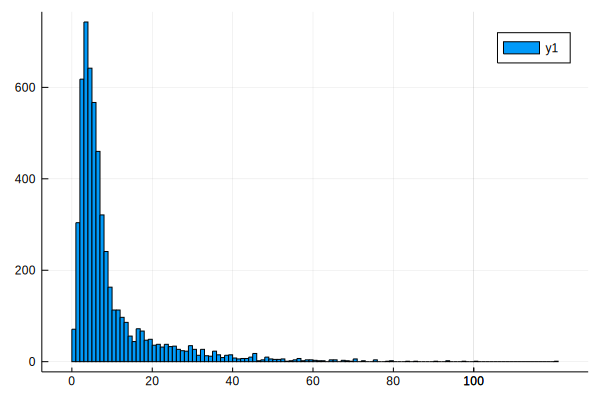

In [14]:
histogram(train.Price)

## The target variable looks so skewed. Let's transform it using log function

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[15]:1
└ @ Core In[15]:1


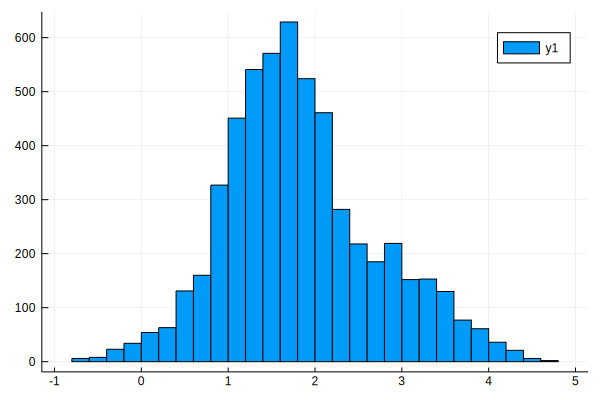

In [15]:
train[:log_price] = log.(train.Price)
histogram(train.log_price)

In [16]:
## This looks almost like a bell shaped curve.

### MISSING VALUES IMPUTATION

### For missing values of seats, power, Engine, Mileage.I followed this approach :
### Created a dictionary for all cars & their mean value of the Attribute(Power/Mileage, etc.,) & used the dictionary to impute the missing values when we found those cars in missing data 

In [17]:
non_missing_data = train[(ismissing.(train.Power) .== 0) .* (ismissing.(train.Seats) .== 0),[:Name,:Power,:Seats,:Engine,:Mileage]]
grouped = aggregate(non_missing_data,:Name,mean);

In [18]:
### Creating imputing dictionaries

function get_tuple(a,b)
    return (a,b)
end;
power_dict = Dict([elem[1] => elem[2] for elem in get_tuple.(grouped.Name,grouped.Power_mean)])
seats_dict = Dict([elem[1] => elem[2] for elem in get_tuple.(grouped.Name,grouped.Seats_mean)])
engine_dict = Dict([elem[1] => elem[2] for elem in get_tuple.(grouped.Name,grouped.Engine_mean)])
mileage_dict = Dict([elem[1] => elem[2] for elem in get_tuple.(grouped.Name,grouped.Mileage_mean)]);

## Array of all cars present in dictionary
cars_in_dict = []
for (k,v) in power_dict
    push!(cars_in_dict,k)
end

## Missing values imputing indices

power_subset_indices = intersect(findall(x -> ismissing(x), train.Power) , (findall(in(cars_in_dict), train.Name)))
mileage_subset_indices = intersect(findall(x -> ismissing(x), train.Mileage) , (findall(in(cars_in_dict), train.Name)))
engine_subset_indices = intersect(findall(x -> ismissing(x), train.Engine) , (findall(in(cars_in_dict), train.Name)))
seats_subset_indices = intersect(findall(x -> ismissing(x), train.Seats) , (findall(in(cars_in_dict), train.Name)));

#Imputing function

function imputing(df,subset_indices,dictionary)
    temp = df[subset_indices,:]
    return [dictionary[i] for i in temp.Name]
end

## Missing Values Imputation

train[power_subset_indices,:Power] = imputing(train,power_subset_indices,power_dict)
train[engine_subset_indices,:Engine] = imputing(train,engine_subset_indices,engine_dict)
train[seats_subset_indices,:Seats] = imputing(train,seats_subset_indices,seats_dict)
train[mileage_subset_indices,:Mileage] = imputing(train,mileage_subset_indices,mileage_dict);

new_train = train[completecases(train[:,[:Power,:Engine,:Seats,:Mileage]]),:];
println("new train data shape is:",size(new_train))

println("Missing Values percentage: ",(1-(size(new_train)[1]/size(train)[1]))*100)
println("Missing Values count: ",(size(train)[1]-size(new_train)[1]))

new train data shape is:(5419, 15)
Missing Values percentage: 1.9185520361990949
Missing Values count: 106


## ASSUMPTIONS OF LINEAR REGRESSION:
### 1. LINEAR RELATIONSHIP BETWEEN PREDICTORS & TARGET
### 2. NORMALITY of RESIDUALS
### 3. NO MULTI-COLLINEARITY
### 4. NO AUTOCORRELATION OF RESIDUALS
### 5. NO HETERO-SKEDASTICITY 

## Check Multi-collinearity

In [19]:
cor_data = new_train[:,setdiff(names(new_train), [:Id,:Name,:Brand,:Location,:Fuel_Type,:Transmission,:Owner_Type])]
cor2 = DataFrame([(var1=names(cor_data)[i],
                   var2=names(cor_data)[j],
                   cor=cor(cor_data[!, i], cor_data[!, j])) for i in 2:ncol(cor_data) for j in 2:ncol(cor_data)])
unstack(cor2, :var2, :cor)

,var1,Engine,Kilometers_Driven,Mileage,Power,Price,Seats,log_price
,Symbol,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Engine,1.0,0.0927568,-0.736316,0.863347,0.66212,0.406296,0.686999
2,Kilometers_Driven,0.0927568,1.0,-0.0868315,0.0333834,-0.00356179,0.0816416,-0.0387066
3,Mileage,-0.736316,-0.0868315,1.0,-0.604355,-0.417856,-0.399464,-0.411987
4,Power,0.863347,0.0333834,-0.604355,1.0,0.781286,0.101994,0.770896
5,Price,0.66212,-0.00356179,-0.417856,0.781286,1.0,0.0580936,0.858635
6,Seats,0.406296,0.0816416,-0.399464,0.101994,0.0580936,1.0,0.16703
7,log_price,0.686999,-0.0387066,-0.411987,0.770896,0.858635,0.16703,1.0


### We can see that 'Engine' and power are highly correlated(0.863).We can drop one of these columns
### After them, 'Mileage' and 'Engine' are highly correlated(-0.736).Better drop 'Engine' so that the correlation 
### is not much affecting the model

In [20]:
## Pre-processing 2 ##
new_train = new_train[:,setdiff(names(new_train),[:Engine])];

### In our Data,
### Continuous data - Mileage(km/kg),Kilometers_Driven,Engine(CC),Power(bhp),year
### Categorical Data-
###       - Nominal variables- location, Fuel_Type,Transmission 
###       - Ordinal variables- Owner_Type ,Name,Seats

## Outlier Treatment for Contnuous variables:

In [21]:
names(new_train)

14-element Array{Symbol,1}:
 :Id               
 :Name             
 :Location         
 :Year             
 :Kilometers_Driven
 :Fuel_Type        
 :Transmission     
 :Owner_Type       
 :Mileage          
 :Power            
 :Seats            
 :Price            
 :Brand            
 :log_price        

In [22]:
plotlyjs()

Plots.PlotlyJSBackend()

In [23]:
using StatsPlots

In [24]:
boxplot(new_train.Kilometers_Driven)

<!DOCTYPE html>
 
 
 Plots.jl

### We can see that Kilometers_Driven has 1 potential outlier(6500000).Let's see the distribution without that record

In [25]:
boxplot(new_train[new_train.Kilometers_Driven .< 6500000,:Kilometers_Driven])

<!DOCTYPE html>
 
 
 Plots.jl

### I shall impute the values of Kilometers_Driven > upper_threshold to upper_threshold.

In [26]:
kms_upper_threshold = median(new_train.Kilometers_Driven)+(1.5*iqr(new_train.Kilometers_Driven))

111539.25

### Let's not impute many records. Since, this value's gonna affect many records

In [27]:
kms_upper_threshold = percentile(new_train.Kilometers_Driven,99)
kms_upper_threshold

171860.9999999997

In [28]:
### I think this value looks fine.It doesn't affect many records.So, by having the underlying nature of Data
### & imputing the Data that may really cause some problems.We can arrive at a trade-off at 99 percentile

In [29]:
new_train[(new_train[:Kilometers_Driven] .> kms_upper_threshold ),:Kilometers_Driven] = kms_upper_threshold

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[29]:1
└ @ Core In[29]:1
┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = top-level scope at In[29]:1
└ @ Core In[29]:1


171860.9999999997

In [30]:
boxplot(new_train.Kilometers_Driven)

<!DOCTYPE html>
 
 
 Plots.jl

In [31]:
boxplot(new_train.Mileage)

<!DOCTYPE html>
 
 
 Plots.jl

### Those Mileage = 0 records are Electric cars.It makes sense to keep them as it is.

In [32]:
boxplot(new_train.Power)

<!DOCTYPE html>
 
 
 Plots.jl

In [33]:
power_upper_threshold = percentile(new_train.Power,99)

296.75999999999476

### Let's make the power upper threshold as 300 

In [34]:
power_upper_threshold  = 300
new_train[(new_train[:Power] .> power_upper_threshold ),:Power]= power_upper_threshold

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:2
└ @ Core In[34]:2
┌ Warning: implicit broadcasting in setindex! is deprecated; use `df[row_inds, col_ind] .= Ref(v)` broadcasting assignment to change the column in place
│   caller = top-level scope at In[34]:2
└ @ Core In[34]:2


300

### Since,Engine is being dropped.I'm not imputing outliers of that columns 

In [35]:
### I want to convert Seats to Categorical Data.Since, it can't have values as 4.4 
new_train.Seats = CategoricalArray(new_train.Seats);

In [36]:
owner_type_mapping = Dict("First" => 4,"Second"=> 3,"Third"=> 2,"Fourth & Above"=> 1)
owner_type_encoded = [owner_type_mapping[i] for i in new_train.Owner_Type if haskey(owner_type_mapping,i)];

In [37]:
dummy_cols = [:Brand,:Location,:Fuel_Type,:Transmission,:Seats]
dummies_dict = Dict()
for col in dummy_cols
    dummies_dict[col] = unique(new_train[col])
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[37]:4
└ @ Core .\In[37]:4


In [38]:
dummies_dict

Dict{Any,Any} with 5 entries:
  :Brand        => ["maruti", "honda", "audi", "hyundai", "nissan", "toyota", "tata", "land rover", "mitsubishi", "renault"  …  "chevrolet", "skoda", "mini", "fiat", "jeep", "ambassador", "isuzu", "force", "bentley", "lamborghini"]
  :Location     => ["Mumbai", "Chennai", "Coimbatore", "Hyderabad", "Jaipur", "Kochi", "Kolkata", "Delhi", "Pune", "Bangalore", "Ahmedabad"]
  :Transmission => ["Manual", "Automatic"]
  :Seats        => Union{Missing, Float64}[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, 10.0, 9.0]
  :Fuel_Type    => ["CNG", "Petrol", "Diesel", "LPG", "Electric"]

In [39]:
function get_dummies_df(inp_df,dum_cols,dum_dict)
    df = copy(inp_df)
    for col in dum_cols
        for val in dum_dict[col]
            col_val = string(col, "_" , val)
            df[Symbol(col_val)] = ifelse.(df[col] .== val, 1, 0)
        end
    end
return df
end

get_dummies_df (generic function with 1 method)

In [40]:
train_w_dummies = get_dummies_df(new_train,dummy_cols,dummies_dict);
dummies_train = delete!(train_w_dummies,[:Id,:Name,:Location,:Year,:Kilometers_Driven,:Fuel_Type,:Transmission,:Owner_Type,:Mileage,:Power,:Seats,:Price,:Brand,:log_price]);

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = get_dummies_df(::DataFrame, ::Array{Symbol,1}, ::Dict{Any,Any}) at In[39]:6
└ @ Main .\In[39]:6
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_dummies_df(::DataFrame, ::Array{Symbol,1}, ::Dict{Any,Any}) at In[39]:6
└ @ Main .\In[39]:6
┌ Warning: `delete!(df::AbstractDataFrame, cols::Any)` is deprecated, use `select!(df, Not(cols))` instead.
│   caller = top-level scope at In[40]:2
└ @ Core In[40]:2


In [41]:
# using MLDataUtils
# (X_train1, y_train1), (X_test1, y_test1) = 
splitobs((transpose(X), y); at = 0.7)

UndefVarError: UndefVarError: X not defined

In [42]:
X = hcat(new_train[[:Id,:Name,:Year,:Kilometers_Driven,:Mileage,:Power]],dummies_train,
    DataFrame(owner_type_encoded = owner_type_encoded))
y = new_train[:log_price];

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[42]:1
└ @ Core In[42]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[42]:3
└ @ Core In[42]:3


In [43]:
### train-test-split
using Lathe
using Lathe.preprocess: TrainTestSplit

tagged = hcat(X,DataFrame(y = y))

train_data, val_data = Lathe.preprocess.TrainTestSplit(tagged,0.7); 

In [44]:
fea_col = [:Year , :Power , :owner_type_encoded , :Fuel_Type_CNG , :Fuel_Type_Diesel , :Fuel_Type_Electric ,
                   :Fuel_Type_LPG , :Fuel_Type_Petrol , :Kilometers_Driven , :Mileage]

10-element Array{Symbol,1}:
 :Year              
 :Power             
 :owner_type_encoded
 :Fuel_Type_CNG     
 :Fuel_Type_Diesel  
 :Fuel_Type_Electric
 :Fuel_Type_LPG     
 :Fuel_Type_Petrol  
 :Kilometers_Driven 
 :Mileage           

In [45]:
for col in fea_col
val_data[!,col] = recode(val_data[!,col], missing => mean(skipmissing(val_data[!,col])))
end;

In [46]:
for col in fea_col
train_data[!,col] = recode(train_data[!,col], missing => mean(skipmissing(train_data[!,col])))
end;

In [47]:
names(train_data)

63-element Array{Symbol,1}:
 :Id                    
 :Name                  
 :Year                  
 :Kilometers_Driven     
 :Mileage               
 :Power                 
 :Brand_maruti          
 :Brand_honda           
 :Brand_audi            
 :Brand_hyundai         
 :Brand_nissan          
 :Brand_toyota          
 :Brand_tata            
 ⋮                      
 :Transmission_Manual   
 :Transmission_Automatic
 Symbol("Seats_5.0")    
 Symbol("Seats_7.0")    
 Symbol("Seats_8.0")    
 Symbol("Seats_4.0")    
 Symbol("Seats_6.0")    
 Symbol("Seats_2.0")    
 Symbol("Seats_10.0")   
 Symbol("Seats_9.0")    
 :owner_type_encoded    
 :y                     

In [55]:
cor_data = train_data[:,[:Year , :Power , :Kilometers_Driven , :Mileage , :owner_type_encoded]]
cor2 = DataFrame([(var1=names(cor_data)[i],
                   var2=names(cor_data)[j],
                   cor=cor(cor_data[!, i], cor_data[!, j])) for i in 2:ncol(cor_data) for j in 2:ncol(cor_data)])
unstack(cor2, :var2, :cor)

,var1,Kilometers_Driven,Mileage,Power,owner_type_encoded
,Symbol,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Kilometers_Driven,1.0,-0.225216,0.010399,-0.25655
2,Mileage,-0.225216,1.0,-0.623155,0.147123
3,Power,0.010399,-0.623155,1.0,-0.023254
4,owner_type_encoded,-0.25655,0.147123,-0.023254,1.0


In [64]:
linearRegressor = lm(@formula(y ~ Year + Power  + Kilometers_Driven  + owner_type_encoded + Fuel_Type_Petrol  + 
        Fuel_Type_Diesel ), train_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + Year + Power + Kilometers_Driven + owner_type_encoded + Fuel_Type_Petrol + Fuel_Type_Diesel

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────
                         Estimate   Std. Error    t value  Pr(>|t|)      Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         -232.374       4.24715      -54.713      <1e-99  -240.701       -224.047     
Year                   0.115519    0.00211243    54.6852     <1e-99     0.111377       0.11966   
Power                  0.0123713   0.000108243  114.291      <1e-99     0.012159       0.0125835 
Kilometers_Driven     -8.37259e-7  2.0645e-7     -4.0555     <1e-4     -1.24202e-6    -4.32493e-7
owner_type_encoded     0.0488

In [65]:
r2(linearRegressor)

0.861076421267865

In [76]:
train_predictions = predict(linearRegressor, train_data[[:Year , :Power , :Kilometers_Driven, :owner_type_encoded, :Fuel_Type_Diesel,
                    :Fuel_Type_Petrol ]])
train_predictions = recode(train_predictions, missing => mean(skipmissing(train_predictions)))
train_rmse = rmsd(train_predictions,train_data[:y])
train_rmse

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[76]:1
└ @ Core In[76]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[76]:4
└ @ Core In[76]:4


0.31683756122701223

In [77]:
length(train_predictions)

3762

In [80]:
val_predictions = predict(linearRegressor, val_data[[:Year , :Power ,:Kilometers_Driven , :owner_type_encoded , :Fuel_Type_Diesel,:Fuel_Type_Petrol ]])
val_predictions = recode(val_predictions, missing => mean(skipmissing(val_predictions)))
val_rmse = rmsd(val_predictions,val_data[:y])

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[80]:1
└ @ Core In[80]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[80]:3
└ @ Core In[80]:3


0.32799350014650874

In [ ]:
##### Next step would be Prediction on Test data after the same pre-processing steps on test data.s